# Step 1: Data Collection - Load and inspect the dataset

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"E:\Unified Mentor\Life Expectancy Analysis\Life Expectancy Data.csv")
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [85]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2938, 22)

Data Types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object



# Step 2: Data Preprocessing

In [87]:
# Handle missing values - fill with median for numerical columns and mode for categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert 'Status' to numerical (0 for Developing, 1 for Developed)
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

In [89]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

In [91]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,...,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,...,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


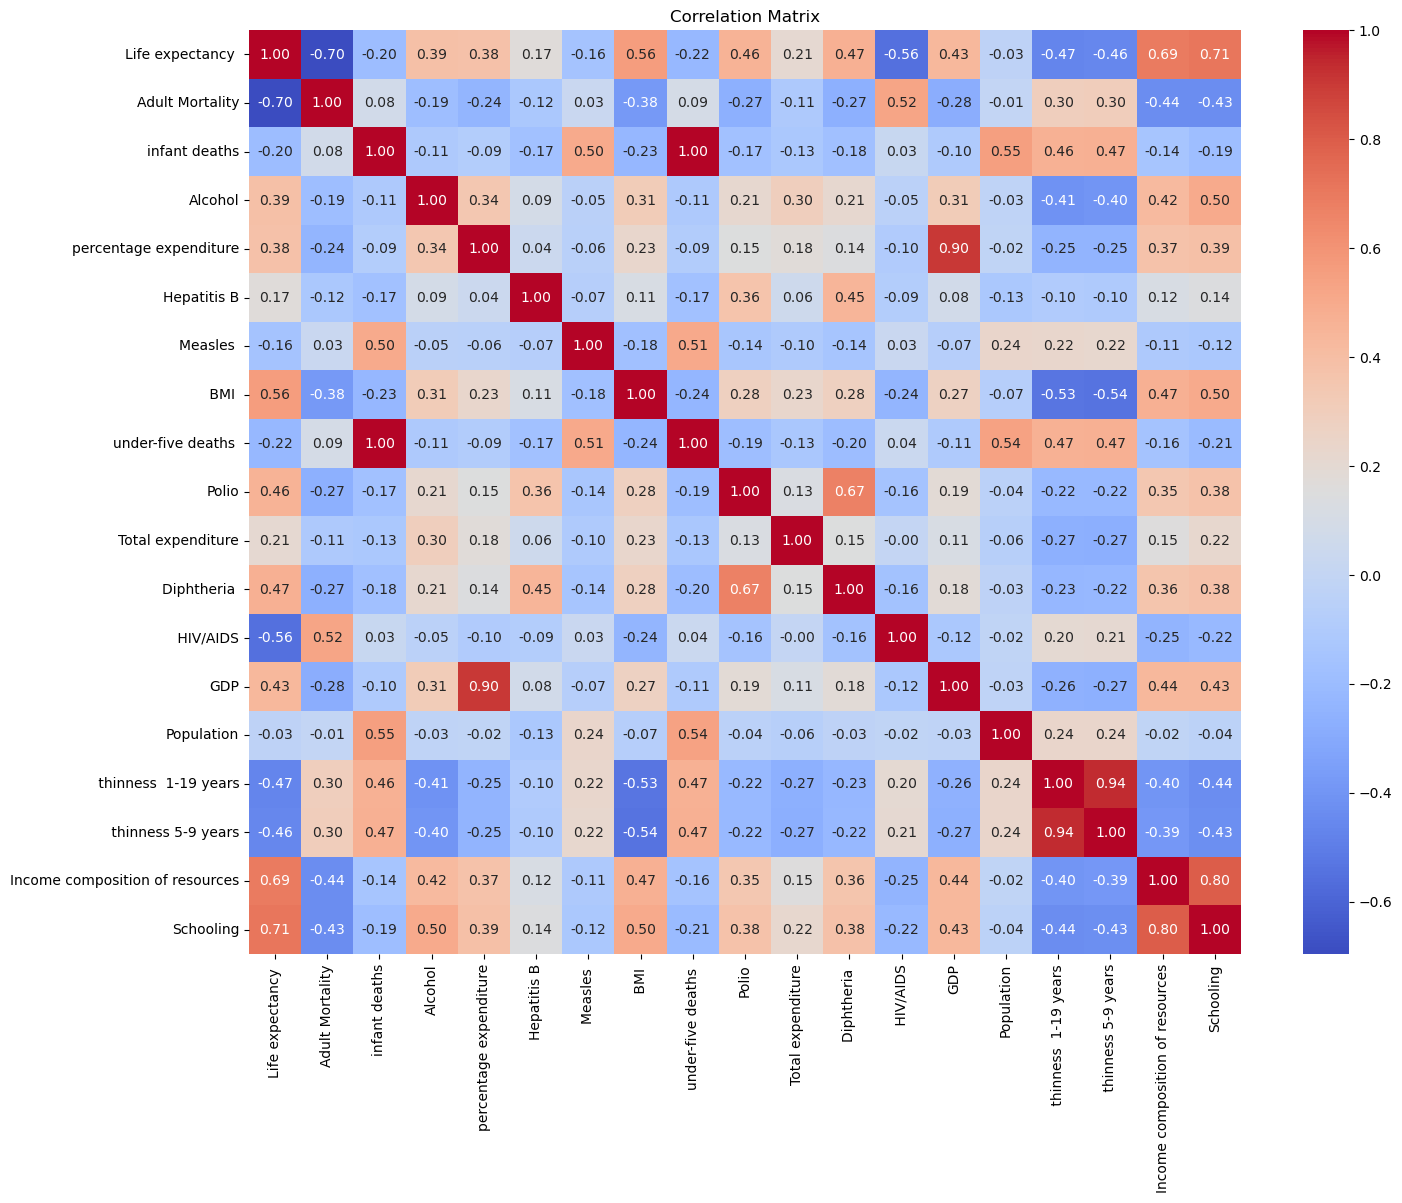

In [93]:
# Correlation matrix

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Exclude 'Year' and 'Status' if they exist in the DataFrame
columns_to_exclude = ['Year', 'Status']
numeric_df = numeric_df.drop(columns=[col for col in columns_to_exclude if col in numeric_df.columns])

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

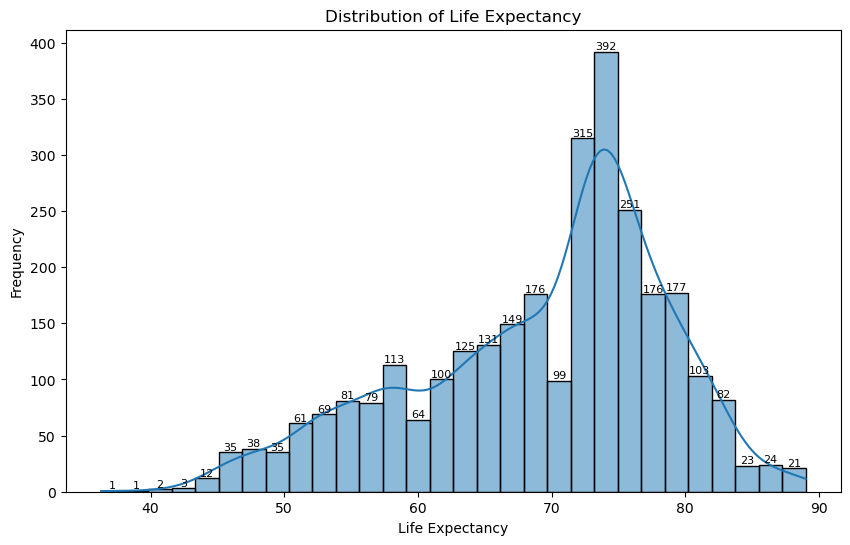

In [95]:
# Life expectancy distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Life expectancy '], kde=True, bins=30)

# Add count labels on top of each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2,
                height + 0.2, f'{int(height)}',
                ha='center', va='bottom', fontsize=8)
    
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

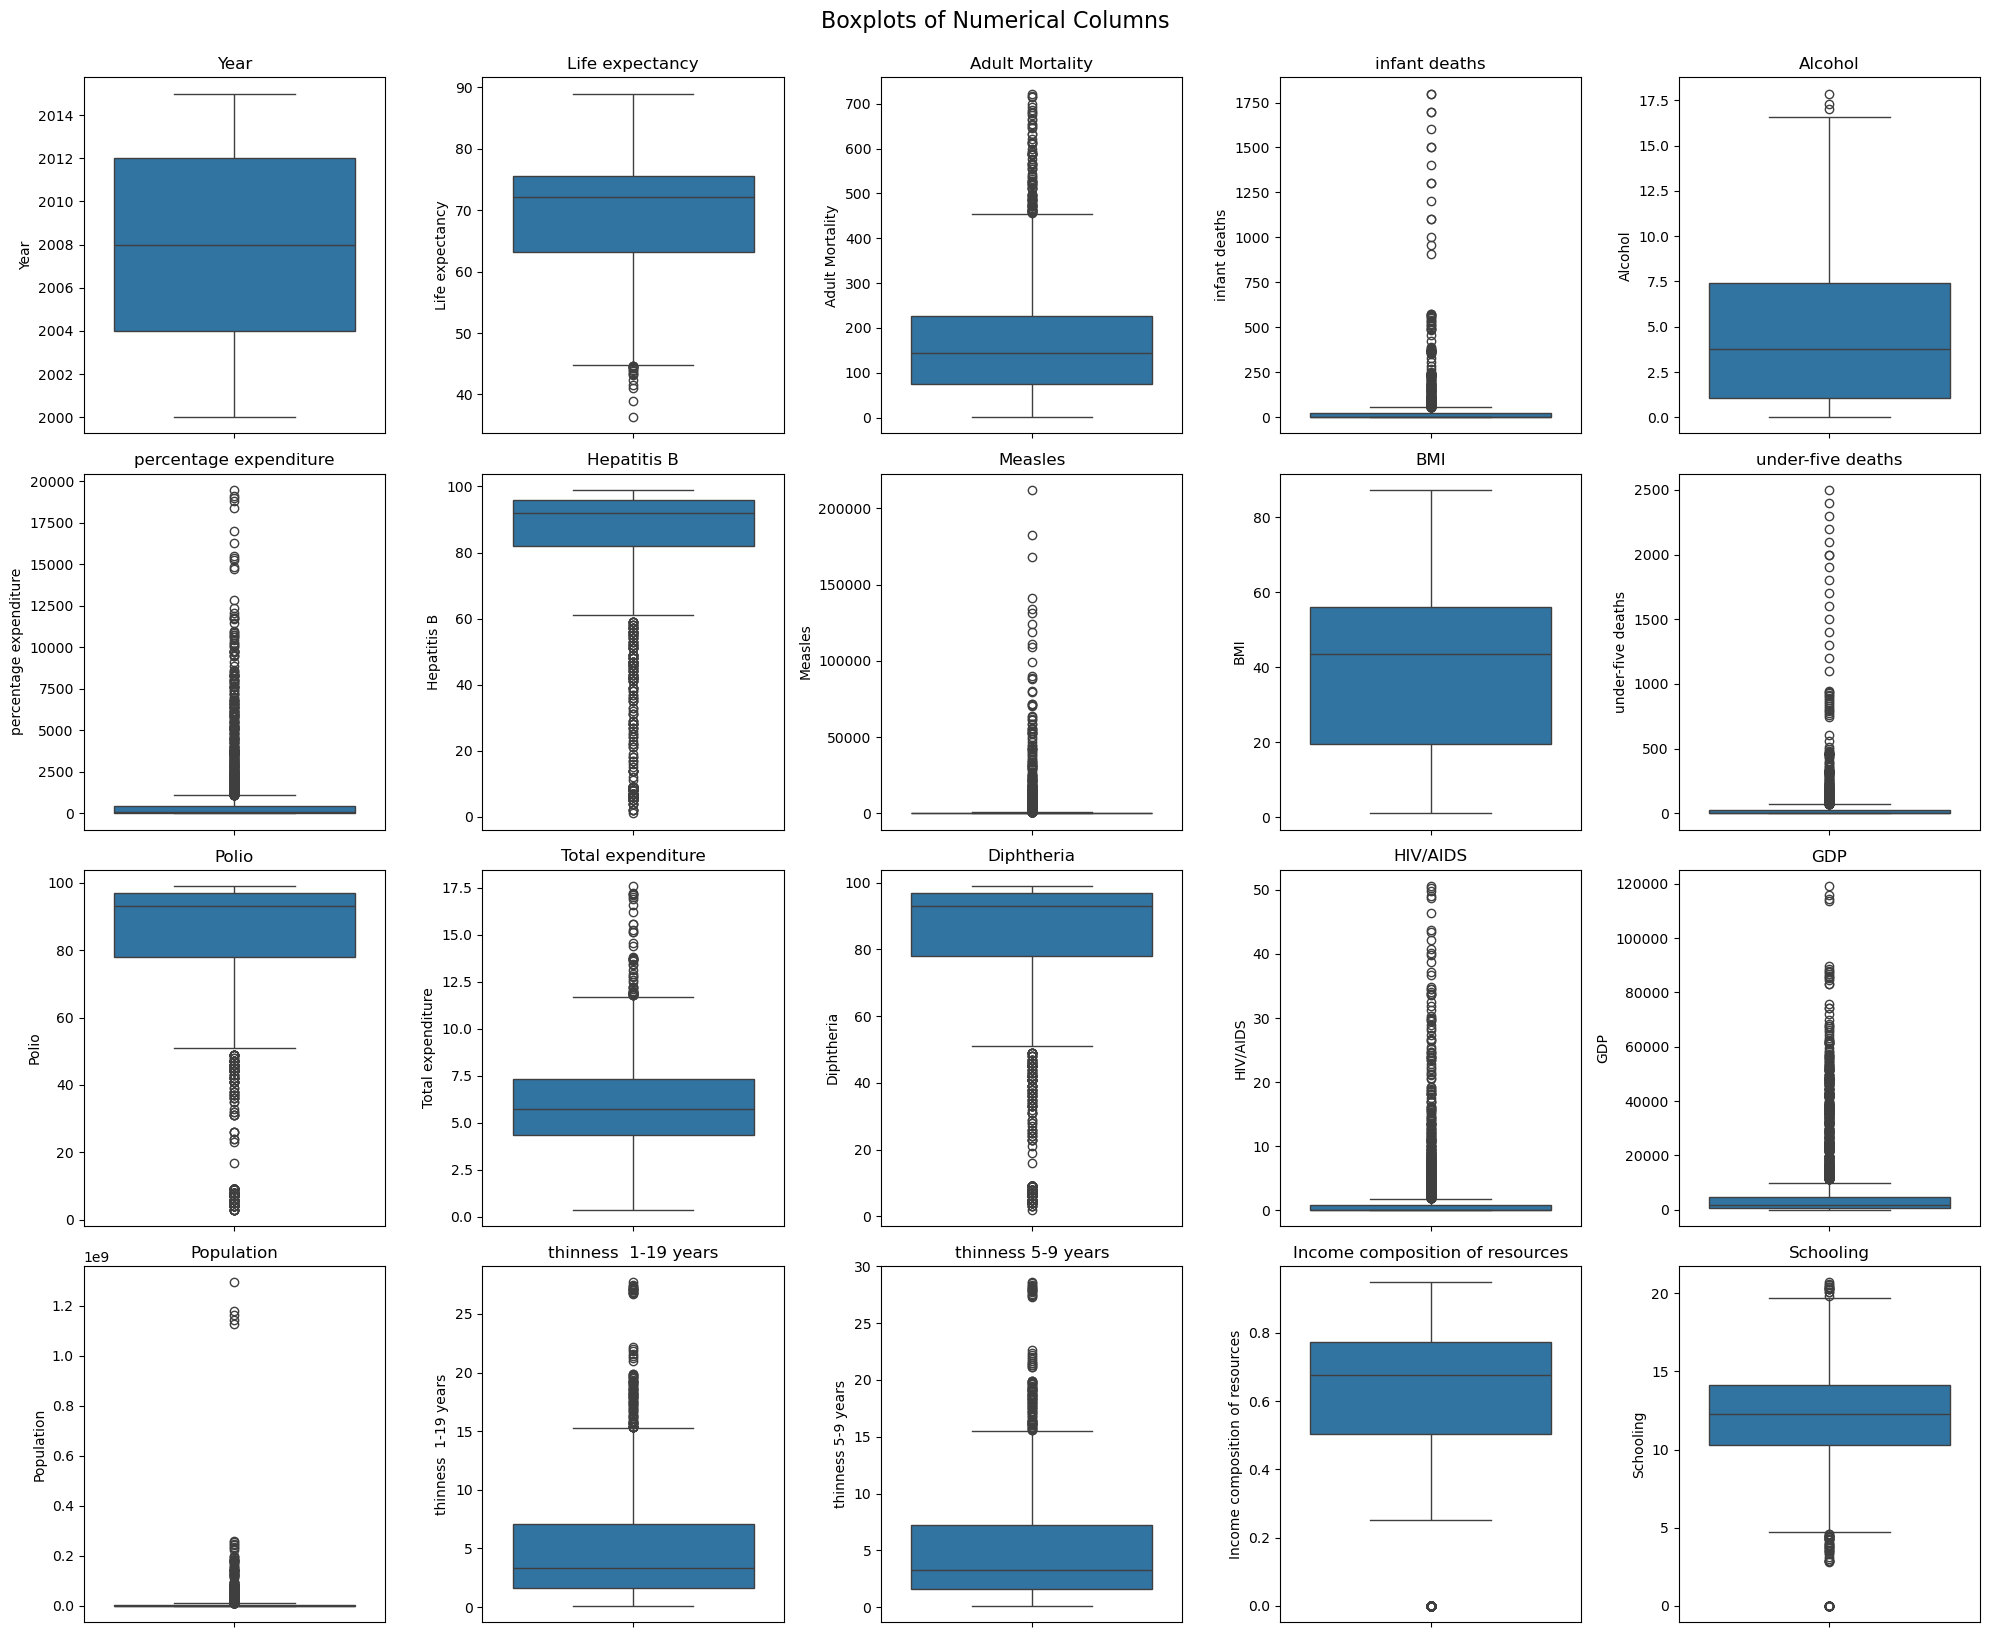

In [173]:
# Plot boxplots for each numerical column

# Select only numerical columns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Status')
num_plots = len(num_cols)

# Set up the plot grid - 5 plots per row
rows = (num_plots + 4) // 5  # Round up division

# Create figure with dynamic size
plt.figure(figsize=(20, 4*rows))

# Plot each numerical column
for i, col in enumerate(num_cols, 1):  # Start counting from 1 for subplot
    plt.subplot(rows, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02, fontsize=16)
plt.show()

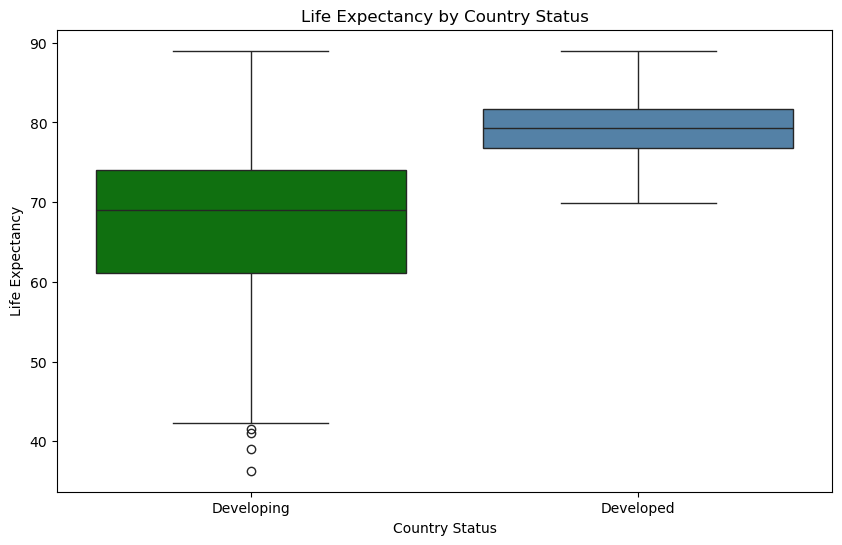

In [97]:
# Life expectancy by status
# Strip column names and values
df.columns = df.columns.str.strip()
df['Status'] = df['Status'].astype(str).str.strip()

# Map 0/1 to labels if needed
status_map = {'0': 'Developing', '1': 'Developed'}
df['Status'] = df['Status'].map(status_map)

# Define color palette
status_colors = {'Developing': 'green', 'Developed': 'steelblue'}

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Status', y='Life expectancy', data=df, hue='Status', palette=status_colors)
ax.set_title('Life Expectancy by Country Status')
ax.set_xlabel('Country Status')
ax.set_ylabel('Life Expectancy')
plt.show()

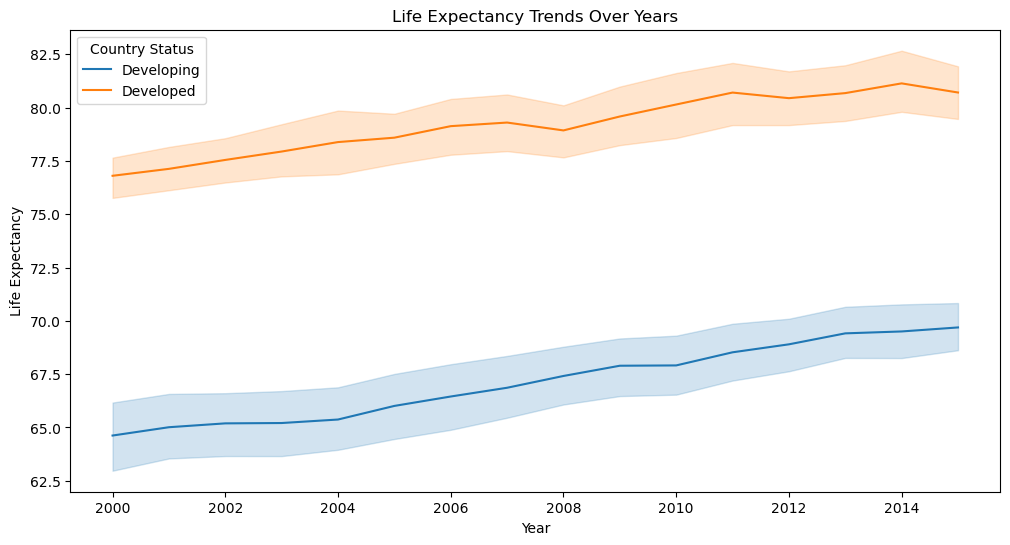

In [111]:
# Life expectancy trends over years

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=df)
plt.title('Life Expectancy Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country Status')
plt.show()

# Step 5: Visualization (continued from EDA)

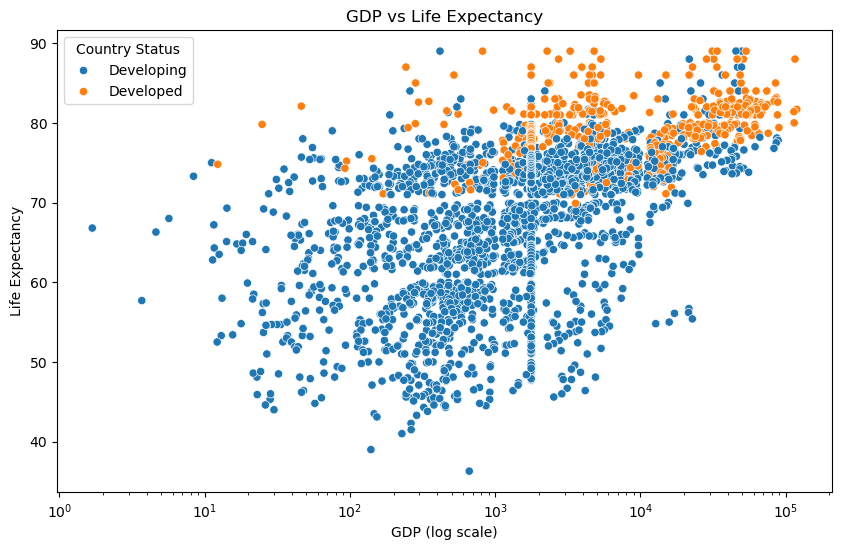

In [116]:
# Scatter plot of GDP vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=df)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy')
plt.xscale('log')  # Useful if GDP has wide range
plt.legend(title='Country Status')
plt.show()

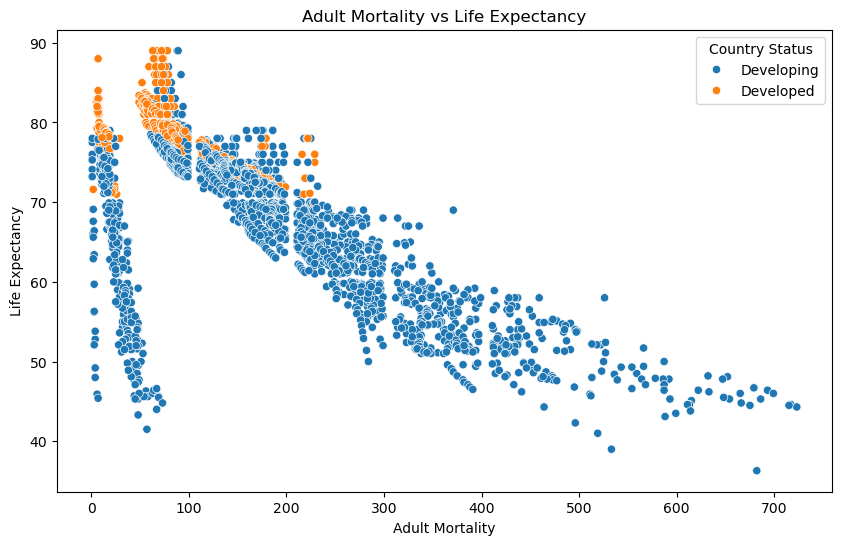

In [122]:
# Adult mortality vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adult Mortality', y='Life expectancy', hue='Status', data=df)
plt.title('Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.legend(title='Country Status')
plt.show()

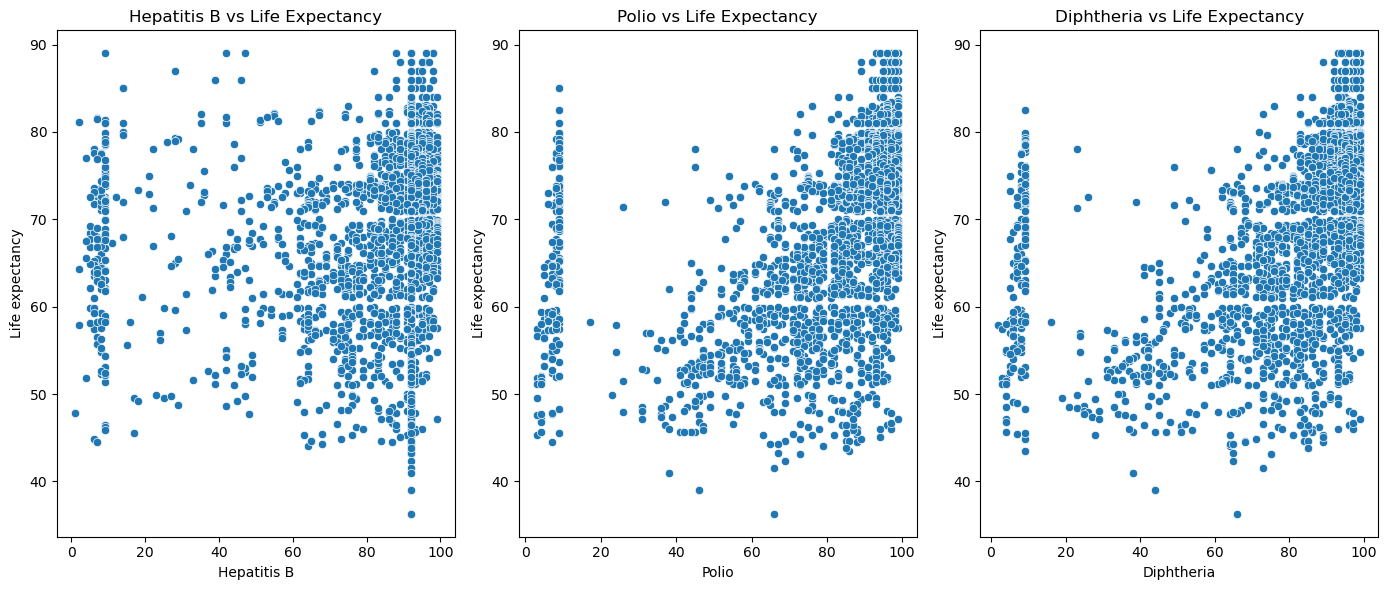

In [126]:
# Immunization impact on life expectancy
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Hepatitis B', y='Life expectancy', data=df)
plt.title('Hepatitis B vs Life Expectancy')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Polio', y='Life expectancy', data=df)
plt.title('Polio vs Life Expectancy')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Diphtheria', y='Life expectancy', data=df)
plt.title('Diphtheria vs Life Expectancy')

plt.tight_layout()
plt.show()

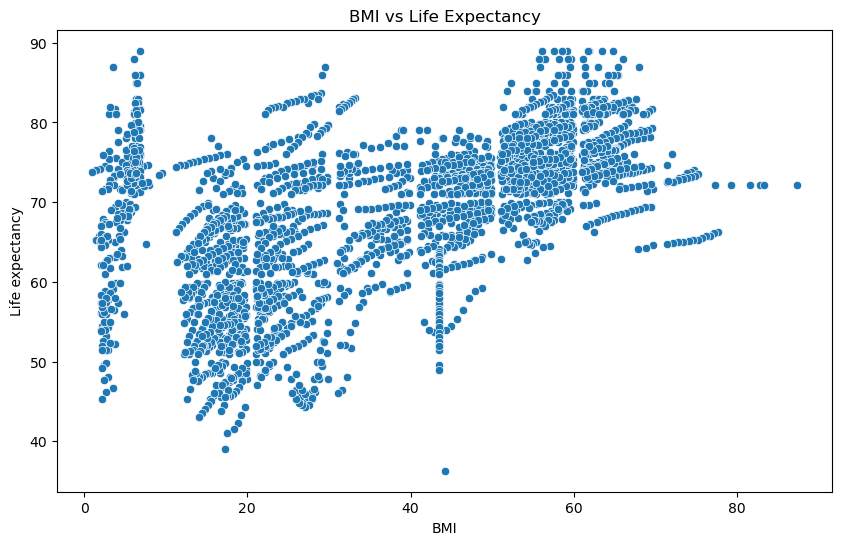

In [130]:
# BMI vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Life expectancy', data=df)
plt.title('BMI vs Life Expectancy')
plt.show()

In [148]:
# Select features and target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode 'Status' column (binary categorical)
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # 'Developing' -> 0, 'Developed' -> 1

# List of features to use (make sure all are properly stripped of spaces)
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
            'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
            'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Status']

# Optional: fix column names if there are extra spaces in the DataFrame
df.columns = df.columns.str.strip()

# Feature matrix and target variable
X = df[features]
y = df['Life expectancy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train and evaluate a linear regression model


Model Evaluation:
Mean Squared Error: 15.29
R-squared: 0.82

Feature Importance:
                            Feature  Coefficient
1                     infant deaths    10.848321
17                        Schooling     2.072287
16  Income composition of resources     1.241047
10                       Diphtheria     0.988131
6                               BMI     0.820257
8                             Polio     0.649013
12                              GDP     0.509024
2                           Alcohol     0.218112
3            percentage expenditure     0.099897
9                 Total expenditure     0.087662
15               thinness 5-9 years     0.079904
13                       Population    -0.054444
5                           Measles    -0.264567
14             thinness  1-19 years    -0.434647
4                       Hepatitis B    -0.457241
18                           Status    -0.638305
11                         HIV/AIDS    -2.420930
0                   Adult Mortality 

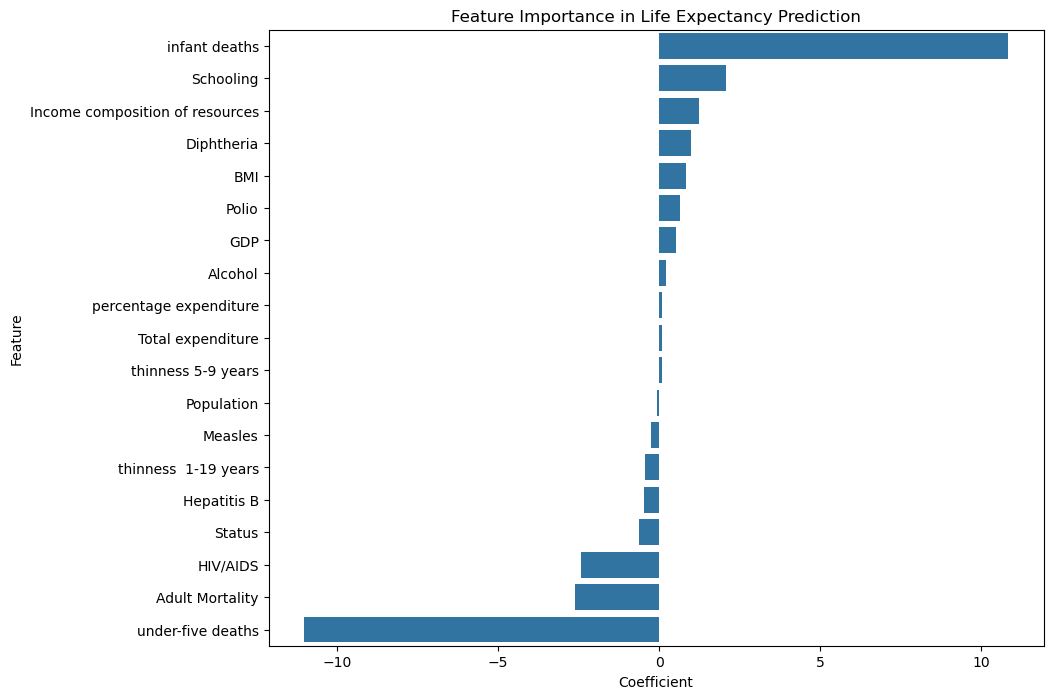

In [151]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Life Expectancy Prediction')
plt.show()